In [18]:
import random

x, y = 1.0, 1.0
delta = 0.1
n_trials = 4000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    #acceiption vs rejection
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    #counting
    if x**2 + y**2 < 1.0: 
        n_hits += 1
print(4.0 * n_hits / float(n_trials))

3.087


In [27]:
import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)

errors  = []
bunches = []

for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:#dataが空になったら繰り返し処理を止める
        x = data.pop()# リスト型の最後の要素を削除する
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    var=mean_sq / N - (mean / N) ** 2
    errors.append(math.sqrt(var/N))
    
    bunches.append(i)
    data = new_data[:]

print('the mean value \u00B1 the standard deviation of data :  {0:.3f} \u00B1 {1:.3f}'.format(mean / float(N), errors[-1]))



the mean value ± the standard deviation of data :  3.153 ± 0.008


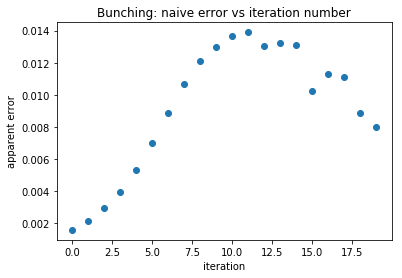

In [28]:
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number')
#pylab.savefig('apparent_error_bunching.png')
pylab.show()